In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import seaborn as sns; sns.set()
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2D t-sne for installation number

In [2]:
df = pd.read_csv('data/pivot.csv', low_memory=False)
df.head(5)

,Year,Consumer_number,Consumer_type,Installation_number,1,2,3,4,5,6,7,8,9,10,11,12
0,2014,1,3,3069,0.0,270.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,0.0,0.0,0.0
1,2014,5,1,5,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014,7,2,7,14.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014,11,1,11,5.0,4.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014,13,2,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
monthes=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [4]:
df_2019 = df[df['Year'] == 2019].drop(columns={'Year'})
df_2018 = df[df['Year'] == 2018].drop(columns={'Year'})
df_2020 = df[df['Year'] == 2020].drop(columns={'Year'})

In [5]:
month_2018 = df_2018.loc[:, monthes]
month_2019 = df_2019.loc[:, monthes]
month_2020 = df_2020.loc[:, monthes]

In [6]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

In [7]:
res_2018 = tsne.fit_transform(month_2018)
res_2019 = tsne.fit_transform(month_2019)
res_2020 = tsne.fit_transform(month_2020)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 18483 samples in 0.075s...
[t-SNE] Computed neighbors for 18483 samples in 11.597s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18483
[t-SNE] Computed conditional probabilities for sample 2000 / 18483
[t-SNE] Computed conditional probabilities for sample 3000 / 18483
[t-SNE] Computed conditional probabilities for sample 4000 / 18483
[t-SNE] Computed conditional probabilities for sample 5000 / 18483
[t-SNE] Computed conditional probabilities for sample 6000 / 18483
[t-SNE] Computed conditional probabilities for sample 7000 / 18483
[t-SNE] Computed conditional probabilities for sample 8000 / 18483
[t-SNE] Computed conditional probabilities for sample 9000 / 18483
[t-SNE] Computed conditional probabilities for sample 10000 / 18483
[t-SNE] Computed conditional probabilities for sample 11000 / 18483
[t-SNE] Computed conditional probabilities for sample 12000 / 18483
[t-SNE] Computed conditional probabilities for s

In [8]:
df_subset_2018 = pd.DataFrame(data=res_2018, columns=['x', 'y'])
df_subset_2019 = pd.DataFrame(data=res_2019, columns=['x', 'y'])
df_subset_2020 = pd.DataFrame(data=res_2020, columns=['x', 'y'])

For the same parameters of the DBSCAN eps=0.25, min_samples=3 as for previous clustering for Consumer number, the count of clusters is 83

In [106]:
clf_2018 = DBSCAN(eps=0.5, min_samples=3).fit(df_subset_2018)
labels_2018 = clf_2018.labels_
n_clusters_2018 = len(set(labels_2018)) - (1 if -1 in labels_2018 else 0)
print("\nClusters discovered 2018: %d" % n_clusters_2018)

clf_2019 = DBSCAN(eps=0.5, min_samples=3).fit(df_subset_2019)
labels_2019 = clf_2019.labels_
n_clusters_2019 = len(set(labels_2019)) - (1 if -1 in labels_2019 else 0)
print("\nClusters discovered 2019: %d" % n_clusters_2019)

clf_2020 = DBSCAN(eps=0.5, min_samples=3).fit(df_subset_2020)
labels_2020 = clf_2020.labels_
n_clusters_2020 = len(set(labels_2020)) - (1 if -1 in labels_2020 else 0)
print("\nClusters discovered 2020: %d" % n_clusters_2020)



Clusters discovered 2018: 20

Clusters discovered 2019: 18

Clusters discovered 2020: 17


In [107]:
sns.set(rc={'figure.figsize':(8, 18)})

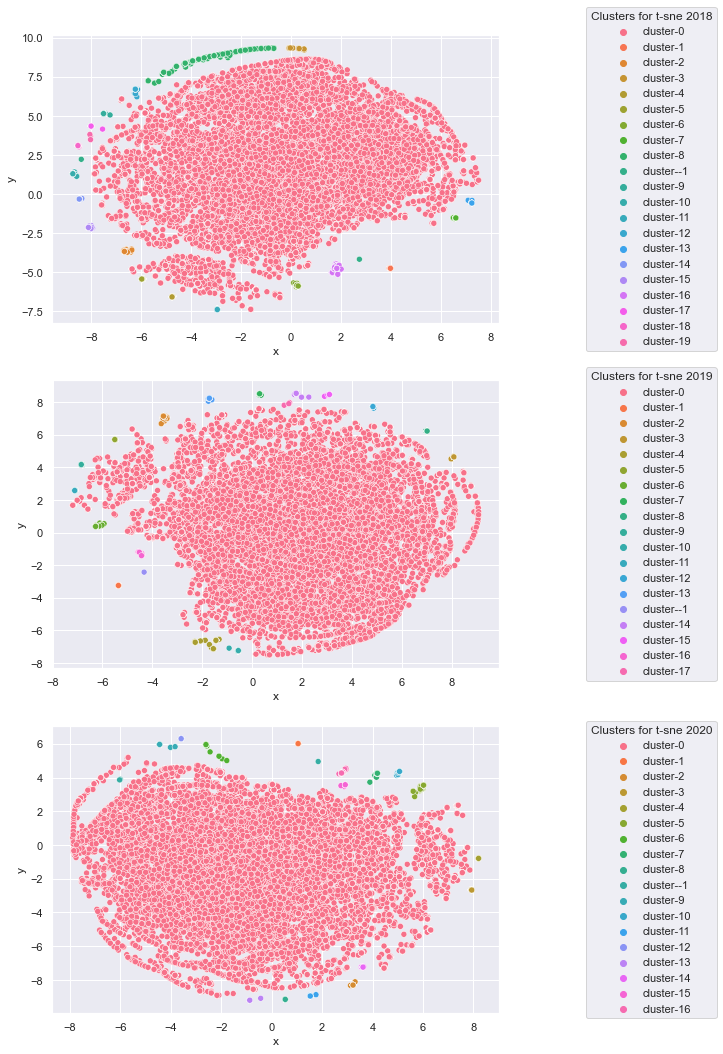

In [109]:
fig, axs = plt.subplots(ncols=1, nrows=3)

sns.scatterplot(df_subset_2018['x'], df_subset_2018['y'], 
                hue=["cluster-{}".format(x) for x in labels_2018], ax=axs[0])\
                .legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)\
                .set_title('Clusters for t-sne 2018')

sns.scatterplot(df_subset_2019['x'], df_subset_2019['y'], 
                hue=["cluster-{}".format(x) for x in labels_2019], 
                ax=axs[1]).legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)\
                .set_title('Clusters for t-sne 2019')
    
sns.scatterplot(df_subset_2020['x'], df_subset_2020['y'], 
                hue=["cluster-{}".format(x) for x in labels_2020], 
                ax=axs[2]).legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)\
                .set_title('Clusters for t-sne 2020')
    
plt.savefig("charts/dbscan/dbscan_t-sne_clusters_installation_number.png", bbox_inches='tight')
plt.show()

In [110]:
labels_2018 = pd.DataFrame(labels_2018, columns=['Label'])
labels_2018.loc[labels_2018["Label"] == -1, "Label"] = labels_2018.nunique()

labels_2019 = pd.DataFrame(labels_2019, columns=['Label'])
labels_2019.loc[labels_2019["Label"] == -1, "Label"] = labels_2019.nunique()

labels_2020 = pd.DataFrame(labels_2020, columns=['Label'])
labels_2020.loc[labels_2020["Label"] == -1, "Label"] = labels_2020.nunique()

In [111]:
finalDf_2018 = pd.merge(df_subset_2018, df['Consumer_type'], left_index=True, right_index=True).drop(columns={'x', 'y'})
finalDf_2018['Count'] = finalDf_2018['Consumer_type']
finalDf_2018 = pd.merge(finalDf_2018, labels_2018, left_index=True, right_index=True)
finalDf_2018 = finalDf_2018.groupby(['Label', 'Consumer_type'], as_index=False).agg({'Count':'count'})
finalDf_2018 =  finalDf_2018.astype({'Label':'int'})

finalDf_2019 = pd.merge(df_subset_2019, df['Consumer_type'], left_index=True, right_index=True).drop(columns={'x', 'y'})
finalDf_2019['Count'] = finalDf_2019['Consumer_type']
finalDf_2019 = pd.merge(finalDf_2019, labels_2019, left_index=True, right_index=True)
finalDf_2019 = finalDf_2019.groupby(['Label', 'Consumer_type'], as_index=False).agg({'Count':'count'})
finalDf_2019 =  finalDf_2019.astype({'Label':'int'})

finalDf_2020 = pd.merge(df_subset_2020, df['Consumer_type'], left_index=True, right_index=True).drop(columns={'x', 'y'})
finalDf_2020['Count'] = finalDf_2020['Consumer_type']
finalDf_2020 = pd.merge(finalDf_2020, labels_2020, left_index=True, right_index=True)
finalDf_2020 = finalDf_2020.groupby(['Label', 'Consumer_type'], as_index=False).agg({'Count':'count'})
finalDf_2020 =  finalDf_2020.astype({'Label':'int'})

In [112]:
data = [[1, 'DOMÉSTICO'], [2, ' COM/INDUSTRIAL/OBRAS'], [3, 'UTIL.PUBLICA'], [4, 'OBRAS'], [5, 'ESTADO'], 
              [6, 'IGREJAS'], [7, 'EXP.A.RURAL'], [9, 'RURAL DOMÉSTICO'], [10, 'RURAL/ESTADO'], [11, 'FAM.NUMEROSAS'], 
              [12, 'FAM.CARENCIADAS'], [13, 'NUMER./CARENC.'], [14, 'CP.DOM/URB'], [15, 'CP.COM/URB'], [16, 'CP.DOM/RURAL'], 
              [17, 'CP.COM/RURAL'], [18, 'IPSS/IGR/RURAL'], [19, 'DOM./RURAL A.S'], [20, 'COM./RURAL A.S'], 
              [21, 'REGA'], [22, 'CMB']]
cons_tipos = pd.DataFrame(data, columns = ['Consumer_type', 'Name'])

In [113]:
finalDf_2018 = pd.merge(finalDf_2018, cons_tipos, on="Consumer_type").drop(columns={'Consumer_type'})\
                 .rename(columns={'Name':'Consumer_type'})

finalDf_2019 = pd.merge(finalDf_2019, cons_tipos, on="Consumer_type").drop(columns={'Consumer_type'})\
                 .rename(columns={'Name':'Consumer_type'})

finalDf_2020 = pd.merge(finalDf_2020, cons_tipos, on="Consumer_type").drop(columns={'Consumer_type'})\
                 .rename(columns={'Name':'Consumer_type'})

In [114]:
pivot_2018 = pd.pivot(finalDf_2018, values='Count', index=['Label'], columns=['Consumer_type']).fillna(0)
pivot_2018 = pivot_2018.rename_axis(None,axis=1).reset_index()

pivot_2019 = pd.pivot(finalDf_2019, values='Count', index=['Label'], columns=['Consumer_type']).fillna(0)
pivot_2019 = pivot_2019.rename_axis(None,axis=1).reset_index()

pivot_2020 = pd.pivot(finalDf_2020, values='Count', index=['Label'], columns=['Consumer_type']).fillna(0)
pivot_2020 = pivot_2020.rename_axis(None,axis=1).reset_index()

In [115]:
pivot_0_1_2018 = pivot_2018[(pivot_2018['Label'] == 0) | (pivot_2018['Label'] == 1)]
pivot_1_23_2018 = pivot_2018[pivot_2018['Label'] != 0]
pivot_1_23_2018 = pivot_1_23_2018[pivot_1_23_2018 ['Label'] != 1]

pivot_0_1_2019 = pivot_2019[(pivot_2019['Label'] == 0) | (pivot_2019['Label'] == 1)]
pivot_1_23_2019 = pivot_2019[pivot_2019['Label'] != 0]
pivot_1_23_2019 = pivot_1_23_2019[pivot_1_23_2019 ['Label'] != 1]

pivot_0_1_2020 = pivot_2020[(pivot_2020['Label'] == 0) | (pivot_2020['Label'] == 1)]
pivot_1_23_2020 = pivot_2020[pivot_2020['Label'] != 0]
pivot_1_23_2020 = pivot_1_23_2020[pivot_1_23_2020 ['Label'] != 1]

In [116]:
colors = ['#023047', '#ffb703', '#8ecae6','#f1c0e8', '#f72585', '#006d77', '#7400b8',  '#ef476f', 
          '#757bc8', '#001233', '#00f5d4', '#8ac926', '#ffca3a','#b7094c', '#8338ec', '#ffc6ff', 
          '#70e000', '#0d47a1']

In [117]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

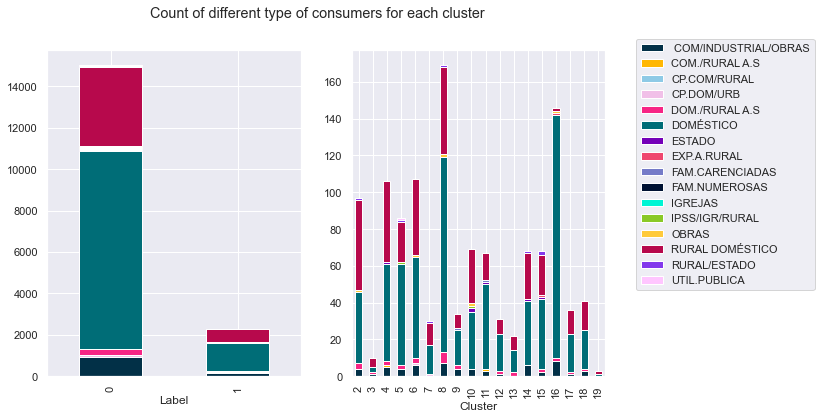

In [118]:
fig, axs = plt.subplots(ncols=2)

pivot_0_1_2018.plot(figsize=(10,6), x = 'Label', kind='bar', stacked=True, color=colors, ax=axs[0])\
              .legend().set_visible(False)
plt.xlabel('Cluster')

pivot_1_23_2018.plot(figsize=(10,6), x = 'Label', kind='bar', stacked=True, color=colors, ax=axs[1])\
               .legend(bbox_to_anchor=(1.1, 1.05))

plt.xlabel('Cluster')
fig.suptitle('Count of different type of consumers for each cluster')
plt.savefig("charts/dbscan/dbscan_tsne_clusters_2018_profile.png", bbox_inches='tight')
plt.show()

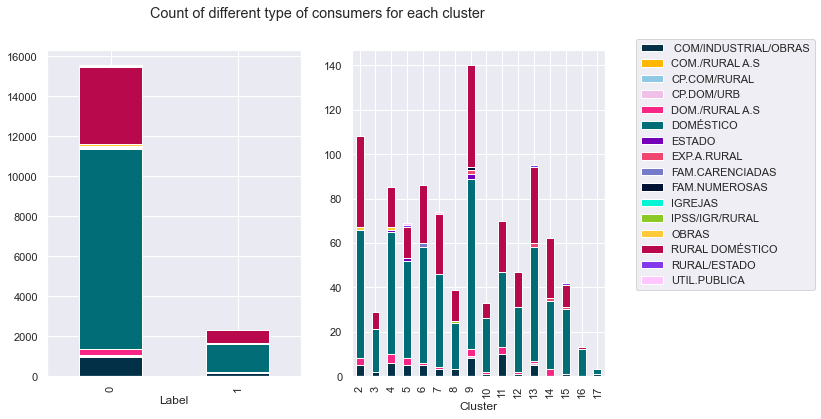

In [120]:
fig, axs = plt.subplots(ncols=2)

pivot_0_1_2019.plot(figsize=(10,6), x = 'Label', kind='bar', stacked=True, color=colors, ax=axs[0])\
              .legend().set_visible(False)
plt.xlabel('Cluster')

pivot_1_23_2019.plot(figsize=(10,6), x = 'Label', kind='bar', stacked=True, color=colors, ax=axs[1])\
               .legend(bbox_to_anchor=(1.1, 1.05))

plt.xlabel('Cluster')
fig.suptitle('Count of different type of consumers for each cluster')
plt.savefig("charts/dbscan/dbscan_tsne_clusters_2019_profile.png", bbox_inches='tight')
plt.show()

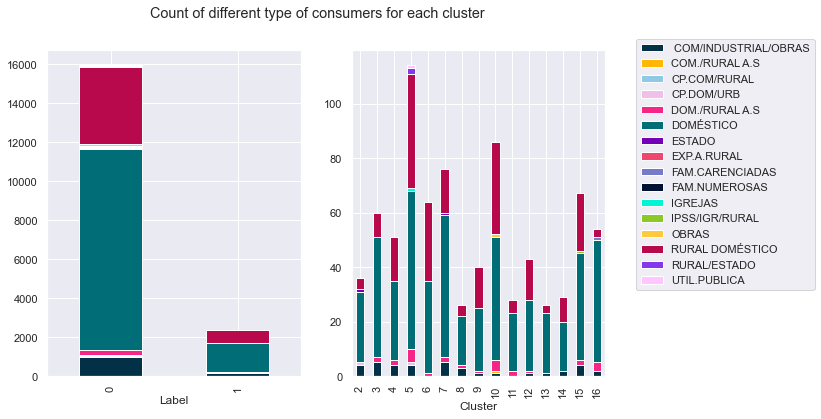

In [121]:
fig, axs = plt.subplots(ncols=2)

pivot_0_1_2020.plot(figsize=(10,6), x = 'Label', kind='bar', stacked=True, color=colors, ax=axs[0])\
              .legend().set_visible(False)
plt.xlabel('Cluster')

pivot_1_23_2020.plot(figsize=(10,6), x = 'Label', kind='bar', stacked=True, color=colors, ax=axs[1])\
               .legend(bbox_to_anchor=(1.1, 1.05))

plt.xlabel('Cluster')
fig.suptitle('Count of different type of consumers for each cluster')
plt.savefig("charts/dbscan/dbscan_tsne_clusters_2020_profile.png", bbox_inches='tight')
plt.show()

# 3D t-sne for installation number

In [ ]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
res = tsne.fit_transform(df.loc[:, monthes])
res

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 18842 samples in 0.044s...
[t-SNE] Computed neighbors for 18842 samples in 6.235s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18842
[t-SNE] Computed conditional probabilities for sample 2000 / 18842
[t-SNE] Computed conditional probabilities for sample 3000 / 18842
[t-SNE] Computed conditional probabilities for sample 4000 / 18842
[t-SNE] Computed conditional probabilities for sample 5000 / 18842
[t-SNE] Computed conditional probabilities for sample 6000 / 18842
[t-SNE] Computed conditional probabilities for sample 7000 / 18842
[t-SNE] Computed conditional probabilities for sample 8000 / 18842
[t-SNE] Computed conditional probabilities for sample 9000 / 18842
[t-SNE] Computed conditional probabilities for sample 10000 / 18842
[t-SNE] Computed conditional probabilities for sample 11000 / 18842
[t-SNE] Computed conditional probabilities for sample 12000 / 18842
[t-SNE] Computed conditional probabilities for sa

array([[-2.6183615 , -1.9952917 , -4.3753567 ],
       [-3.6373749 , -0.8264791 , -3.5083966 ],
       [-2.955183  , -3.7477458 , -1.749968  ],
       ...,
       [-0.52249765, -5.4235373 ,  1.2386796 ],
       [ 4.1980143 , -0.2387199 ,  0.81767035],
       [-1.6235617 , -1.3747122 , -4.9839234 ]], dtype=float32)

In [105]:
df_subset_3d = pd.DataFrame(data=res, columns=['x', 'y', 'z'])
df_subset_3d.head()

,x,y,z
0,-2.618361,-1.995292,-4.375357
1,-3.637375,-0.826479,-3.508397
2,-2.955183,-3.747746,-1.749968
3,-1.506573,2.410694,2.725070
4,-4.836747,0.493681,-1.432013


In [109]:
clf = DBSCAN(eps=0.4, min_samples=3).fit(df_subset_3d)
labels = clf.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("\nClusters discovered: %d" % n_clusters_)


Clusters discovered: 113


In [111]:
labels = pd.DataFrame(labels, columns=['Label'])
labels.loc[labels["Label"] == -1, "Label"] = labels.nunique()
labels.head(5)

,Label
0,0.0
1,1.0
2,1.0
3,2.0
4,1.0


In [113]:
final = df_subset_3d.join(labels)
final.head()

,x,y,z,Label
0,-2.618361,-1.995292,-4.375357,0.0
1,-3.637375,-0.826479,-3.508397,1.0
2,-2.955183,-3.747746,-1.749968,1.0
3,-1.506573,2.410694,2.725070,2.0
4,-4.836747,0.493681,-1.432013,1.0


In [115]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib qt

fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')

x = np.array(df_subset_3d['x'])
y = np.array(df_subset_3d['y'])
z = np.array(df_subset_3d['z'])

ax.scatter(x,y,z, marker="s", c=final["Label"], s=40, cmap="hsv")
# Customize the z axis.
ax.set_zlim(0, 100)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, 40)
plt.show()